## 1 - Flux instantané

1. Récupérer avec wget, le fichier « instantané ».
  Voir `main.py`
2. Créer un script python affichant le nombre de points de vente (pdv). Attention, à l’encodage du fichier ! 
Utiliser donc la classe XMLParser...

In [2]:
import os
from lxml import etree

print(os.path.abspath("./"))

tree = etree.parse('./src/instant/instant.xml')
n1 = len(tree.xpath("/pdv_liste/pdv"))
print(n1)



c:\Users\Alexis Opolka\Documents\depots\import-cours-but-rt\cours\modules\R208\R208-TP\R208-TP1
9978


In [3]:
import os
from lxml import etree

print(os.path.abspath("./"))

tree = etree.parse('./src/instant/instant.xml')
n2 = int(tree.xpath("count(/pdv_liste/pdv)"))
print(n2)


c:\Users\Alexis Opolka\Documents\depots\import-cours-but-rt\cours\modules\R208\R208-TP\R208-TP1
9978


Comme l'on peut le voir ci-dessous, n1 est bien égal à n2

In [4]:
print(n1 == n2)

True


La première méthode, l'on utilise l'expression `count()` dans XPATH,
le nombre ressort en `float` donc si l'on veut un entier,
on doit utiliser `int()` afin de le transformer.
Avec cette méthode, nous n'avons que le nombre,
on ne pourra pas utiliser les éléments pour d'autres utilisations.

La deuxième méthode , l'on utilise la fonction `len()` sur XPATH,
qui nous renvoie en fait une liste de tous les éléments du fichier.
De base, le len ne nous renvoie pas de `float`
(ce qui est normal, compliqué d'avoir 12.5 éléments dans une liste).
On peut en plus réutiliser notre liste d'éléments pour de futures utilisations.

3. Donner le détail du nombre de points de vente sur les routes, les autoroutes et les autres

In [5]:
n = tree.xpath("/pdv_liste/pdv")

nombres = {
  "autoroute": 0,
  "route": 0,
  "autres": 0,
}

for elem in n:
  pop = elem.get("pop")
  if pop == "R": nombres["route"] += 1
  elif pop == "A": nombres["autoroute"] += 1
  else: nombres["autres"] += 1

print(f"Nous avons {nombres['route']} sur les routes, {nombres['autoroute']} sur les autoroutes et {nombres['autres']} autre part.")


Nous avons 9529 sur les routes, 449 sur les autoroutes et 0 autre part.


4. Exécuter maintenant votre script sur le fichier instantané du 21 février 2022 (fourni sur l’ENT). Comparer les valeurs obtenues.

In [6]:
n_tree = etree.parse('./src/instant/instant_ent.xml')

def getPopPosition(parsed_xml: etree._ElementTree):
  n = parsed_xml.xpath("/pdv_liste/pdv")

  nombres = {
      "autoroute": 0,
      "route": 0,
      "autres": 0,
  }

  for elem in n:
    pop = elem.get("pop")
    if pop == "R":
      nombres["route"] += 1
    elif pop == "A":
      nombres["autoroute"] += 1
    else:
      nombres["autres"] += 1
      print(elem.get("id"))

  return nombres

n = getPopPosition(tree)
nn = getPopPosition(n_tree)

print("Sur le premier fichier:")
print(f"Nous avons {n['route']} sur les routes, {n['autoroute']} sur les autoroutes et {n['autres']} autre part.")
print("\nSur celui de l'ENT:")
print(f"Nous avons {nn['route']} sur les routes, {nn['autoroute']} sur les autoroutes et {nn['autres']} autre part.")


95320005
Sur le premier fichier:
Nous avons 9529 sur les routes, 449 sur les autoroutes et 0 autre part.

Sur celui de l'ENT:
Nous avons 9456 sur les routes, 453 sur les autoroutes et 1 autre part.


5. Quel est le POP (Point Of Presence), l’identifiant et le code postal du PDV « autre » ?

In [7]:
n_tree = etree.parse('./src/instant/instant_ent.xml')
autres_pdv = n_tree.xpath("/pdv_liste/pdv[not(@pop='R') and not(@pop='A')]")

for pdv in autres_pdv:
  pop, id, cp = pdv.get("pop"), pdv.get("id"), pdv.get("cp")
  print(f'Un PDV autre a comme informations: \n\t- POP: {pop} \n\t- ID: {id} \n\t- CP: {cp}')


Un PDV autre a comme informations: 
	- POP: N 
	- ID: 95320005 
	- CP: 95320


6. Calculer le prix moyen du gazoil sur toute la france avec la fonction mean() du module statistics. Faire auparavant, une conversion en float() des valeurs.

In [8]:
from statistics import mean

m = mean([float(elem.get("valeur")) for elem in n_tree.xpath("/pdv_liste/pdv/prix[@nom='Gazole']")])

print(f"{m:.4f}")

1.7268


7. Combien de station proposent du SP98 sur le nombre total de stations dans l’Hérault (34) ? Utiliser la fonction XPATH : starts-with(txt,start)

In [9]:

nbr = len(n_tree.xpath("/pdv_liste/pdv[starts-with(@cp, '34')]/prix[@nom='SP98']"))
tnbr = len(n_tree.xpath("/pdv_liste/pdv[starts-with(@cp, '34')]"))

print(f"SP98 dans l'Hérault => {nbr}/{tnbr}")

SP98 dans l'Hérault => 134/161


8. Calculer dans une boucle, le prix moyen du carburant E10 par département en utilisant le code postal.

In [10]:
for i in range(1, 102): # On a théoriquement 101 départements
  i = '0'+str(i) if i < 10 else i
  e10_serving = n_tree.xpath(f"/pdv_liste/pdv[starts-with(@cp, '{i}')]/prix[@nom='E10']")
  nbr = len(e10_serving)
  tnbr = len(n_tree.xpath(f"/pdv_liste/pdv[starts-with(@cp, '{i}')]"))

  if tnbr > 0:
    m_prix = mean([float(nbr.get("valeur")) for nbr in e10_serving])
    print(f"CP:{i} => {nbr}/{tnbr} : {m_prix:.4f}")
  else:
    print(f"CP:{i} => {nbr}/{tnbr} : None")


CP:01 => 72/116 : 1.7666
CP:02 => 63/94 : 1.7663
CP:03 => 46/77 : 1.7799
CP:04 => 38/53 : 1.7840
CP:05 => 31/48 : 1.7568
CP:06 => 122/146 : 1.8199
CP:07 => 42/66 : 1.7473
CP:08 => 33/50 : 1.7647
CP:09 => 24/36 : 1.7600
CP:10 => 47/65 : 1.7812
CP:11 => 57/87 : 1.7795
CP:12 => 50/91 : 1.7883
CP:13 => 226/275 : 1.7692
CP:14 => 85/122 : 1.7611
CP:15 => 25/58 : 1.7655
CP:16 => 48/63 : 1.7569
CP:17 => 92/120 : 1.7576
CP:18 => 37/61 : 1.7694
CP:19 => 47/65 : 1.7821
CP:20 => 2/130 : 1.8495
CP:21 => 82/125 : 1.7910
CP:22 => 79/122 : 1.7453
CP:23 => 19/30 : 1.7860
CP:24 => 52/87 : 1.7577
CP:25 => 66/96 : 1.7663
CP:26 => 86/117 : 1.7774
CP:27 => 71/98 : 1.7579
CP:28 => 60/73 : 1.7734
CP:29 => 98/153 : 1.7353
CP:30 => 97/131 : 1.7692
CP:31 => 166/200 : 1.7671
CP:32 => 31/49 : 1.7640
CP:33 => 176/227 : 1.7695
CP:34 => 130/161 : 1.7783
CP:35 => 120/152 : 1.7551
CP:36 => 31/50 : 1.7702
CP:37 => 66/94 : 1.7737
CP:38 => 133/187 : 1.7769
CP:39 => 48/75 : 1.7723
CP:40 => 70/104 : 1.7767
CP:41 => 45/65 : 

## Flux annuel

1. Récupérer le fichier de l'année en cours
  Voir à nouveau `main.py`
2. Afficher le début du fichier pour constater les petites différences de format par rapport au fichier précédent.

3. On désire afficher la courbe du prix du gazoil sur le point de vente 34500028. Utiliser le module matplotlib pour tracer la courbe. Combien a-t-on de valeurs ?

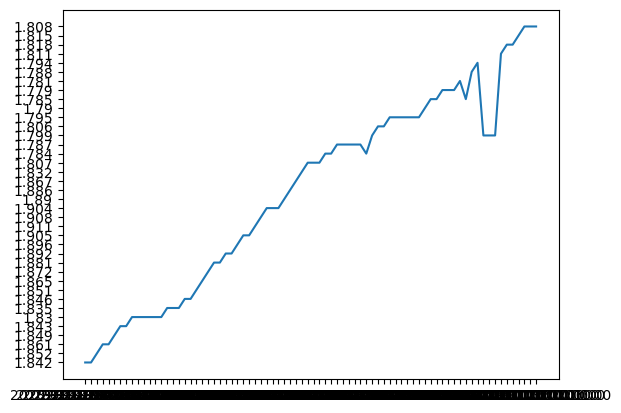

In [11]:
from matplotlib import pyplot as plt

v_tree = etree.parse('./src/instant/instant_2023.xml')
v = v_tree.xpath(f"/pdv_liste/pdv[@id='34500028']/prix[@nom='Gazole']")

plt.plot([elem.get("maj") for elem in v], [elem.get("valeur") for elem in v])
